In [ ]:
# ============================================================
# DATASET STRUCTURE INSPECTION TOOL
# ============================================================

import os

DATASET_PATH = "datasets/FishImg"

def inspect_folder(path, limit=50):
    print(f"DATASET_DIR exists? {os.path.exists(path)}")

    if not os.path.exists(path):
        return

    all_items = sorted(os.listdir(path))

    print(f"\nTop-level items (first {limit}):")
    for item in all_items[:limit]:
        print("-", item)
    if len(all_items) > limit:
        print("... (more than", limit, "items)")

    folders = [x for x in all_items if os.path.isdir(os.path.join(path, x))]

    print("\nSubfolders (first 30):")
    for folder in folders[:30]:
        print("-", folder)

    if len(folders) == 1:
        nested_path = os.path.join(path, folders[0])
        nested_items = sorted(os.listdir(nested_path))

        print("\nDetected single nested folder. Contents inside it (first 50):")
        for item in nested_items[:50]:
            print("-", item)
        if len(nested_items) > 50:
            print("... (more than 50 items)")


inspect_folder(DATASET_PATH)

DATASET_DIR exists? True

Top-level items (first 50):
- test
- train
- val

Subfolders (first 30):
- test
- train
- val


In [2]:
# ============================================================
# DATASET DISTRIBUTION ANALYZER
# ============================================================

import os

DATASET_ROOT = "datasets/FishImg"
TRAIN_PATH = os.path.join(DATASET_ROOT, "train")
VAL_PATH   = os.path.join(DATASET_ROOT, "val")
TEST_PATH  = os.path.join(DATASET_ROOT, "test")

IMAGE_TYPES = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

def list_classes(path):
    return sorted([
        folder for folder in os.listdir(path)
        if os.path.isdir(os.path.join(path, folder))
    ])

def count_class_images(split_path, class_list):
    image_counter = {}

    for cls in class_list:
        cls_dir = os.path.join(split_path, cls)
        total_images = []

        for _, _, files in os.walk(cls_dir):
            total_images.extend([
                f for f in files if f.lower().endswith(IMAGE_TYPES)
            ])

        image_counter[cls] = len(total_images)

    return image_counter

# Collect class lists
train_labels = list_classes(TRAIN_PATH)
val_labels   = list_classes(VAL_PATH)
test_labels  = list_classes(TEST_PATH)

print("Number of Classes")
print("Train:", len(train_labels))
print("Val  :", len(val_labels))
print("Test :", len(test_labels))

print("\nFirst 20 Training Classes:")
print(train_labels[:20])

print("\nClass Set Consistency Check")
print("Train vs Val :", set(train_labels) == set(val_labels))
print("Train vs Test:", set(train_labels) == set(test_labels))

# Image distribution analysis
train_dist = count_class_images(TRAIN_PATH, train_labels)
val_dist   = count_class_images(VAL_PATH, val_labels)
test_dist  = count_class_images(TEST_PATH, test_labels)

def show_summary(name, distribution):
    total = sum(distribution.values())
    smallest = min(distribution, key=distribution.get)
    largest  = max(distribution, key=distribution.get)

    print(f"\n{name.upper()} Summary")
    print("Total images :", total)
    print("Smallest cls :", smallest, f"({distribution[smallest]})")
    print("Largest cls  :", largest,  f"({distribution[largest]})")

show_summary("Train", train_dist)
show_summary("Val", val_dist)
show_summary("Test", test_dist)

sorted_train_dist = sorted(train_dist.items(), key=lambda x: x[1])
print("\nTrain - 5 Smallest Classes:", sorted_train_dist[:5])
print("Train - 5 Largest Classes :", sorted_train_dist[-5:])

Number of Classes
Train: 31
Val  : 31
Test : 31

First 20 Training Classes:
['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish', 'Gourami', 'Grass Carp', 'Green Spotted Puffer', 'Indian Carp', 'Indo-Pacific Tarpon', 'Jaguar Gapote', 'Janitor Fish', 'Knifefish', 'Long-Snouted Pipefish', 'Mosquito Fish']

Class Set Consistency Check
Train vs Val : True
Train vs Test: True

TRAIN Summary
Total images : 8803
Smallest cls : Green Spotted Puffer (110)
Largest cls  : Grass Carp (1222)

VAL Summary
Total images : 2751
Smallest cls : Green Spotted Puffer (34)
Largest cls  : Grass Carp (378)

TEST Summary
Total images : 1760
Smallest cls : Green Spotted Puffer (22)
Largest cls  : Grass Carp (238)

Train - 5 Smallest Classes: [('Green Spotted Puffer', 110), ('Climbing Perch', 152), ('Scat Fish', 154), ('Bangus', 171), ('Mullet', 174)]
Train - 5 Largest Classes : [('Knifefish', 319), ('Silver

In [3]:
# ============================================================
# CNN DATASET LOADER & PREPROCESSING PIPELINE USING TENSORFLOW
# ============================================================

import os
import tensorflow as tf
import numpy as np

# Dataset directories
DATASET_ROOT = "datasets/FishImg"
TRAIN_PATH = os.path.join(DATASET_ROOT, "train")
VAL_PATH   = os.path.join(DATASET_ROOT, "val")
TEST_PATH  = os.path.join(DATASET_ROOT, "test")

# Reproducibility seed
SEED = 42
tf.random.set_seed(SEED)
np.random.seed(SEED)

# Image configuration
IMAGE_SIZE = (224, 224)
BATCH_SIZE = 32

# Fix class ordering to prevent label mismatch
CLASS_LABELS = sorted([
    d for d in os.listdir(TRAIN_PATH)
    if os.path.isdir(os.path.join(TRAIN_PATH, d))
])
NUM_CLASSES = len(CLASS_LABELS)

print("Number of Classes:", NUM_CLASSES)
print("Sample class labels:", CLASS_LABELS[:10])

# Load datasets
train_dataset = tf.keras.utils.image_dataset_from_directory(
    TRAIN_PATH,
    labels="inferred",
    label_mode="int",
    class_names=CLASS_LABELS,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=True,
    seed=SEED
)

val_dataset = tf.keras.utils.image_dataset_from_directory(
    VAL_PATH,
    labels="inferred",
    label_mode="int",
    class_names=CLASS_LABELS,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

test_dataset = tf.keras.utils.image_dataset_from_directory(
    TEST_PATH,
    labels="inferred",
    label_mode="int",
    class_names=CLASS_LABELS,
    image_size=IMAGE_SIZE,
    batch_size=BATCH_SIZE,
    shuffle=False
)

# Normalize pixel values
def normalize(image, label):
    image = tf.cast(image, tf.float32) / 255.0
    return image, label

train_dataset = train_dataset.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
val_dataset   = val_dataset.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)
test_dataset  = test_dataset.map(normalize, num_parallel_calls=tf.data.AUTOTUNE)

# Performance optimization
train_dataset = train_dataset.cache().prefetch(tf.data.AUTOTUNE)
val_dataset   = val_dataset.cache().prefetch(tf.data.AUTOTUNE)
test_dataset  = test_dataset.cache().prefetch(tf.data.AUTOTUNE)

# Sanity check
for batch_images, batch_labels in train_dataset.take(1):
    print("Batch image shape:", batch_images.shape)
    print("Batch label shape:", batch_labels.shape)
    print("Label range:", int(tf.reduce_min(batch_labels)), "to", int(tf.reduce_max(batch_labels)))

C:\Users\HP\AppData\Roaming\Python\Python312\site-packages\keras\src\export\tf2onnx_lib.py:8: FutureWarning: In the future `np.object` will be defined as the corresponding NumPy scalar.
  if not hasattr(np, "object"):


Number of Classes: 31
Sample class labels: ['Bangus', 'Big Head Carp', 'Black Spotted Barb', 'Catfish', 'Climbing Perch', 'Fourfinger Threadfin', 'Freshwater Eel', 'Glass Perchlet', 'Goby', 'Gold Fish']
Found 8819 files belonging to 31 classes.
Found 2751 files belonging to 31 classes.
Found 1761 files belonging to 31 classes.
Batch image shape: (32, 224, 224, 3)
Batch label shape: (32,)
Label range: 1 to 30


Observed label values: [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30]
Label range: 0 to 30
Expected range: 0 30


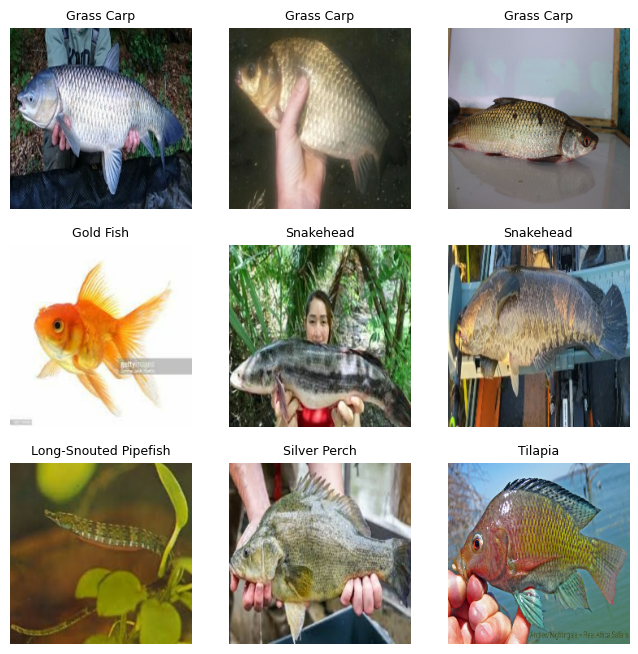

In [4]:
# ============================================================
# DATASET SANITY CHECK & VISUALIZATION
# ============================================================

import matplotlib.pyplot as plt
import numpy as np
import tensorflow as tf

# Check label range across several batches
observed_labels = set()
for _, batch_labels in train_dataset.take(20):
    observed_labels.update(batch_labels.numpy().tolist())

observed_labels = sorted(observed_labels)
print("Observed label values:", observed_labels)
print("Label range:", min(observed_labels), "to", max(observed_labels))
print("Expected range:", 0, NUM_CLASSES - 1)

# Display 9 sample images with labels
plt.figure(figsize=(8, 8))
for batch_images, batch_labels in train_dataset.take(1):
    imgs = batch_images.numpy()
    lbls = batch_labels.numpy()

    for i in range(9):
        plt.subplot(3, 3, i + 1)
        plt.imshow(imgs[i])
        plt.title(CLASS_LABELS[int(lbls[i])], fontsize=9)
        plt.axis("off")

plt.show()

In [5]:
# ============================================================
# CLASS WEIGHT GENERATOR (IMBALANCED DATA HANDLING)
# ============================================================

import os
import numpy as np

DATASET_ROOT = "datasets/FishImg"
TRAIN_PATH = os.path.join(DATASET_ROOT, "train")

IMAGE_EXTENSIONS = (".jpg", ".jpeg", ".png", ".bmp", ".webp")

# Count images per class
train_distribution = {}

for cls in CLASS_LABELS:
    cls_dir = os.path.join(TRAIN_PATH, cls)
    count = 0

    for _, _, files in os.walk(cls_dir):
        count += sum(1 for f in files if f.lower().endswith(IMAGE_EXTENSIONS))

    train_distribution[cls] = count

TOTAL_IMAGES = sum(train_distribution.values())
NUM_CLASSES = len(CLASS_LABELS)

# Compute class weights
CLASS_WEIGHTS = {
    idx: TOTAL_IMAGES / (NUM_CLASSES * max(train_distribution[cls], 1))
    for idx, cls in enumerate(CLASS_LABELS)
}

print("Total training images:", TOTAL_IMAGES)
print("Smallest class:", min(train_distribution, key=train_distribution.get),
      f"({train_distribution[min(train_distribution, key=train_distribution.get)]})")
print("Largest class :", max(train_distribution, key=train_distribution.get),
      f"({train_distribution[max(train_distribution, key=train_distribution.get)]})")

sorted_weights = sorted(CLASS_WEIGHTS.items(), key=lambda x: x[1], reverse=True)

print("\nTop 5 Minority Classes (Highest Weights):")
for i, w in sorted_weights[:5]:
    print(i, CLASS_LABELS[i], "->", round(w, 3))

print("\nTop 5 Majority Classes (Lowest Weights):")
for i, w in sorted_weights[-5:]:
    print(i, CLASS_LABELS[i], "->", round(w, 3))


Total training images: 8803
Smallest class: Green Spotted Puffer (110)
Largest class : Grass Carp (1222)

Top 5 Minority Classes (Highest Weights):
12 Green Spotted Puffer -> 2.582
4 Climbing Perch -> 1.868
24 Scat Fish -> 1.844
0 Bangus -> 1.661
21 Mullet -> 1.632

Top 5 Majority Classes (Lowest Weights):
17 Knifefish -> 0.89
25 Silver Barb -> 0.863
7 Glass Perchlet -> 0.715
8 Goby -> 0.468
11 Grass Carp -> 0.232


In [6]:
# ============================================================
# BASELINE CNN FROM SCRATCH
# ------------------------------------------------------------
# This script builds a baseline Convolutional Neural Network
# trained from scratch to serve as a comparison model before
# applying transfer learning architectures.
# ============================================================

import tensorflow as tf

# ============================================================
# DATA AUGMENTATION
# ============================================================
data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal"),
    tf.keras.layers.RandomRotation(0.05),
    tf.keras.layers.RandomZoom(0.1),
])

# ============================================================
# CNN ARCHITECTURE (FROM SCRATCH)
# ============================================================
baseline_cnn = tf.keras.Sequential([
    tf.keras.layers.Input((224, 224, 3)),
    data_augmentation,

    tf.keras.layers.Conv2D(32, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(64, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(128, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Conv2D(256, 3, padding="same", activation="relu"),
    tf.keras.layers.MaxPooling2D(),

    tf.keras.layers.Flatten(),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(256, activation="relu"),
    tf.keras.layers.Dropout(0.3),
    tf.keras.layers.Dense(NUM_CLASSES, activation="softmax"),
])

# ============================================================
# MODEL COMPILATION
# ============================================================
baseline_cnn.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

baseline_cnn.summary()

# ============================================================
# TRAINING CALLBACKS
# ============================================================
callbacks = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("cnn_scratch_best.keras", save_best_only=True)
]

# ============================================================
# MODEL TRAINING
# ============================================================
history_baseline = baseline_cnn.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=15,
    class_weight=CLASS_WEIGHTS,
    callbacks=callbacks,
    verbose=1
)

# ============================================================
# VALIDATION EVALUATION
# ============================================================
val_loss, val_acc = baseline_cnn.evaluate(val_dataset, verbose=0)
print("Baseline CNN | Validation Accuracy:", round(val_acc * 100, 2), "%")

Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d (Conv2D)                 │ (None, 224, 224, 32)   │           896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 112, 112, 32)   │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 112, 112, 64)   │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 56, 56, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 56, 56, 128)    │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 28, 28, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 28, 28, 256)    │       295,168 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 14, 14, 256)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 50176)          │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │    12,845,312 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 31)             │         7,967 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 13,241,695 (50.51 MB)

 Trainable params: 13,241,695 (50.51 MB)

 Non-trainable params: 0 (0.00 B)

Epoch 1/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 193s 685ms/step - accuracy: 0.0939 - loss: 3.2188 - val_accuracy: 0.1948 - val_loss: 2.9515
Epoch 2/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 169s 613ms/step - accuracy: 0.1999 - loss: 2.7717 - val_accuracy: 0.2923 - val_loss: 2.4614
Epoch 3/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 189s 683ms/step - accuracy: 0.2897 - loss: 2.4515 - val_accuracy: 0.3686 - val_loss: 2.1676
Epoch 4/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 162s 587ms/step - accuracy: 0.3455 - loss: 2.2283 - val_accuracy: 0.4493 - val_loss: 1.9012
Epoch 5/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 167s 604ms/step - accuracy: 0.3989 - loss: 2.0474 - val_accuracy: 0.5071 - val_loss: 1.6664
Epoch 6/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 170s 618ms/step - accuracy: 0.4376 - loss: 1.8982 - val_accuracy: 0.5638 - val_loss: 1.5038
Epoch 7/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 161s 582ms/step - accuracy: 0.4828 - loss: 1.7535 - val_accuracy: 0.5936 - val_loss: 1.3782
Epoch 8/15
276/276 ━━━━━━━━━━━━━━━━━━━━ 160s 578ms/step - accuracy: 0.5132 -

Validation samples: 2751

Confusion Matrix shape: (31, 31)

Confusion Matrix preview (5x5):
[[36  2  0  0  1]
 [ 1 42  0  7  1]
 [ 0  0 49  0  1]
 [ 0  2  0 68  3]
 [ 0  1  0  0 41]]

=== BASELINE CNN CLASSIFICATION REPORT ===
                       precision    recall  f1-score   support

               Bangus     0.7660    0.6923    0.7273        52
        Big Head Carp     0.6087    0.6667    0.6364        63
   Black Spotted Barb     0.8909    0.7778    0.8305        63
              Catfish     0.5965    0.7010    0.6445        97
       Climbing Perch     0.3942    0.8542    0.5395        48
 Fourfinger Threadfin     0.7424    0.8167    0.7778        60
       Freshwater Eel     0.7051    0.6548    0.6790        84
       Glass Perchlet     0.9759    0.6532    0.7826       124
                 Goby     0.7714    0.4286    0.5510       189
            Gold Fish     0.9559    1.0000    0.9774        65
              Gourami     0.8462    0.9072    0.8756        97
           Grass

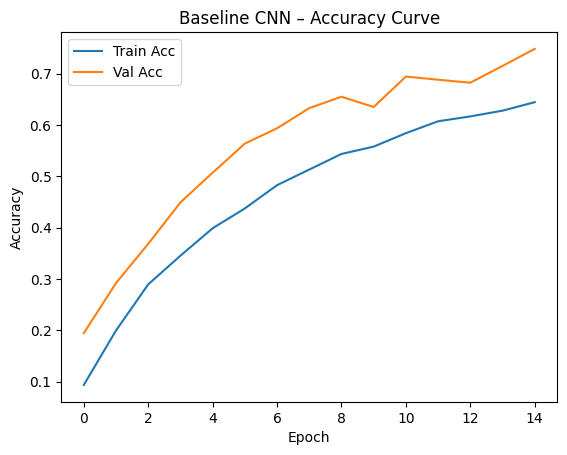

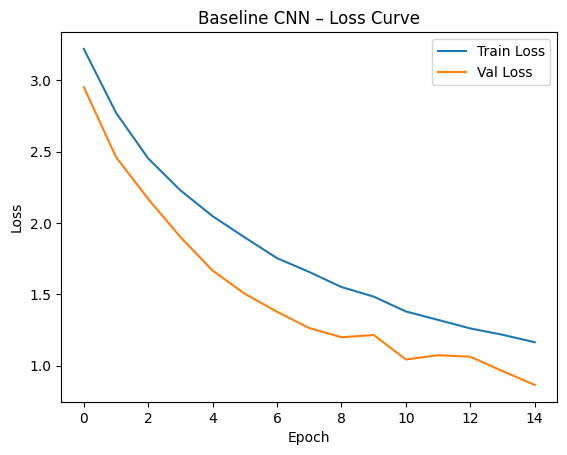

In [7]:
# ============================================================
# BASELINE CNN – VALIDATION EVALUATION & LEARNING CURVES
# ============================================================

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, confusion_matrix

true_vals, pred_vals = [], []

for xb, yb in val_dataset:
    probs = baseline_cnn.predict(xb, verbose=0)
    preds = np.argmax(probs, axis=1)
    true_vals.extend(yb.numpy().tolist())
    pred_vals.extend(preds.tolist())

true_vals = np.array(true_vals)
pred_vals = np.array(pred_vals)

print("Validation samples:", len(true_vals))

cm = confusion_matrix(true_vals, pred_vals)
print("\nConfusion Matrix shape:", cm.shape)
print("\nConfusion Matrix preview (5x5):")
print(cm[:5, :5])

report = classification_report(
    true_vals, pred_vals, target_names=CLASS_LABELS, digits=4, zero_division=0
)
print("\n=== BASELINE CNN CLASSIFICATION REPORT ===")
print(report)

# Learning curves
acc = history_baseline.history.get("accuracy", [])
val_acc = history_baseline.history.get("val_accuracy", [])
loss = history_baseline.history.get("loss", [])
val_loss = history_baseline.history.get("val_loss", [])

plt.figure()
plt.plot(acc, label="Train Acc")
plt.plot(val_acc, label="Val Acc")
plt.title("Baseline CNN – Accuracy Curve")
plt.xlabel("Epoch"); plt.ylabel("Accuracy"); plt.legend(); plt.show()

plt.figure()
plt.plot(loss, label="Train Loss")
plt.plot(val_loss, label="Val Loss")
plt.title("Baseline CNN – Loss Curve")
plt.xlabel("Epoch"); plt.ylabel("Loss"); plt.legend(); plt.show()


In [8]:
# ============================================================
# TRANSFER LEARNING – MOBILENETV2 (FROZEN)
# ============================================================

import tensorflow as tf

IMAGE_SIZE = (224, 224)
NUM_CLASSES = len(CLASS_LABELS)
preprocess_v2 = tf.keras.applications.mobilenet_v2.preprocess_input

base_mnv2 = tf.keras.applications.MobileNetV2(
    input_shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3),
    include_top=False, weights="imagenet"
)
base_mnv2.trainable = False

inputs = tf.keras.Input(shape=(IMAGE_SIZE[0], IMAGE_SIZE[1], 3))
x = data_augmentation(inputs)

# 0..1 → 0..255 → -1..1 (sesuai MobileNetV2)
x = tf.keras.layers.Rescaling(255.0)(x)
x = tf.keras.layers.Lambda(preprocess_v2)(x)

x = base_mnv2(x, training=False)
x = tf.keras.layers.GlobalAveragePooling2D()(x)
x = tf.keras.layers.Dropout(0.3)(x)
outputs = tf.keras.layers.Dense(NUM_CLASSES, activation="softmax")(x)

mnv2_frozen = tf.keras.Model(inputs, outputs)

mnv2_frozen.compile(
    optimizer=tf.keras.optimizers.Adam(1e-3),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

mnv2_frozen.summary()

callbacks_frozen = [
    tf.keras.callbacks.EarlyStopping(patience=3, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("mobilenetv2_frozen_best.keras", save_best_only=True)
]

history_frozen = mnv2_frozen.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=10,
    class_weight=CLASS_WEIGHTS,
    callbacks=callbacks_frozen,
    verbose=1
)

val_loss_frozen, val_acc_frozen = mnv2_frozen.evaluate(val_dataset, verbose=0)
print("MobileNetV2 Frozen | Val Acc:", round(val_acc_frozen * 100, 2), "%")


9406464/9406464 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step



Model: "functional_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer_3 (InputLayer)      │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ sequential (Sequential)         │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ rescaling (Rescaling)           │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lambda (Lambda)                 │ (None, 224, 224, 3)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ mobilenetv2_1.00_224            │ (None, 7, 7, 1280)     │     2,257,984 │
│ (Functional)                    │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ global_average_pooling2d        │ (None, 1280)           │             0 │
│ (GlobalAveragePooling2D)        │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 1280)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 31)             │        39,711 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 2,297,695 (8.77 MB)

 Trainable params: 39,711 (155.12 KB)

 Non-trainable params: 2,257,984 (8.61 MB)

Epoch 1/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 100s 347ms/step - accuracy: 0.5511 - loss: 1.6788 - val_accuracy: 0.7728 - val_loss: 0.8846
Epoch 2/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 95s 343ms/step - accuracy: 0.7639 - loss: 0.8436 - val_accuracy: 0.8139 - val_loss: 0.6847
Epoch 3/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 147s 362ms/step - accuracy: 0.8075 - loss: 0.6596 - val_accuracy: 0.8419 - val_loss: 0.5745
Epoch 4/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 107s 386ms/step - accuracy: 0.8303 - loss: 0.5786 - val_accuracy: 0.8459 - val_loss: 0.5212
Epoch 5/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 95s 344ms/step - accuracy: 0.8396 - loss: 0.5316 - val_accuracy: 0.8670 - val_loss: 0.4679
Epoch 6/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 95s 343ms/step - accuracy: 0.8542 - loss: 0.4887 - val_accuracy: 0.8750 - val_loss: 0.4515
Epoch 7/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 143s 346ms/step - accuracy: 0.8634 - loss: 0.4477 - val_accuracy: 0.8902 - val_loss: 0.3896
Epoch 8/10
276/276 ━━━━━━━━━━━━━━━━━━━━ 96s 347ms/step - accuracy: 0.8676 - los

In [9]:
# ============================================================
# FINE-TUNING – MOBILENETV2 (PARTIAL UNFREEZE)
# ============================================================

import os
import tensorflow as tf

FROZEN_CKPT = "mobilenetv2_frozen_best.keras"

# Load frozen model if needed
if "mnv2_frozen" not in globals():
    if not os.path.exists(FROZEN_CKPT):
        raise FileNotFoundError("Frozen checkpoint not found: " + FROZEN_CKPT)
    mnv2_frozen = tf.keras.models.load_model(FROZEN_CKPT)
    print("Loaded:", FROZEN_CKPT)

# Find base MobileNetV2 inside the model
base_model = None
for lyr in mnv2_frozen.layers:
    if isinstance(lyr, tf.keras.Model) and "mobilenetv2" in lyr.name.lower():
        base_model = lyr; break

if base_model is None:
    raise ValueError("MobileNetV2 base model not found.")

print("Base model:", base_model.name)

# Unfreeze last 40 layers
base_model.trainable = True
fine_tune_from = len(base_model.layers) - 40
for lyr in base_model.layers[:fine_tune_from]:
    lyr.trainable = False

print("Fine-tune from layer:", fine_tune_from, "of", len(base_model.layers))

mnv2_frozen.compile(
    optimizer=tf.keras.optimizers.Adam(1e-5),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

callbacks_ft = [
    tf.keras.callbacks.EarlyStopping(patience=2, restore_best_weights=True),
    tf.keras.callbacks.ModelCheckpoint("mobilenetv2_finetuned_best.keras", save_best_only=True)
]

history_finetune = mnv2_frozen.fit(
    train_dataset,
    validation_data=val_dataset,
    epochs=5,
    class_weight=CLASS_WEIGHTS,
    callbacks=callbacks_ft,
    verbose=1
)

val_loss_ft, val_acc_ft = mnv2_frozen.evaluate(val_dataset, verbose=0)
print("MobileNetV2 Fine-tuned | Val Acc:", round(val_acc_ft * 100, 2), "%")


Base model: mobilenetv2_1.00_224
Fine-tune from layer: 114 of 154
Epoch 1/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 138s 467ms/step - accuracy: 0.7061 - loss: 0.9764 - val_accuracy: 0.8931 - val_loss: 0.3688
Epoch 2/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 125s 454ms/step - accuracy: 0.8190 - loss: 0.5743 - val_accuracy: 0.8960 - val_loss: 0.3491
Epoch 3/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 124s 449ms/step - accuracy: 0.8479 - loss: 0.4598 - val_accuracy: 0.9037 - val_loss: 0.3284
Epoch 4/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 122s 441ms/step - accuracy: 0.8697 - loss: 0.3961 - val_accuracy: 0.9077 - val_loss: 0.3125
Epoch 5/5
276/276 ━━━━━━━━━━━━━━━━━━━━ 120s 436ms/step - accuracy: 0.8877 - loss: 0.3419 - val_accuracy: 0.9128 - val_loss: 0.2934
MobileNetV2 Fine-tuned | Val Acc: 91.28 %


In [10]:
# ============================================================
# FINAL MODEL COMPARISON & CSV EXPORT
# ============================================================

import numpy as np
import pandas as pd
from sklearn.metrics import classification_report, accuracy_score

def evaluate_on_val(model, dataset, labels):
    yt, yp = [], []
    for xb, yb in dataset:
        p = np.argmax(model.predict(xb, verbose=0), axis=1)
        yt.extend(yb.numpy().tolist())
        yp.extend(p.tolist())
    yt, yp = np.array(yt), np.array(yp)
    acc = accuracy_score(yt, yp)
    rep = classification_report(yt, yp, target_names=labels, digits=4, zero_division=0, output_dict=True)
    return acc, rep["macro avg"]["f1-score"], rep["weighted avg"]["f1-score"]

# Baseline (isi dengan hasil yang sudah kamu dapat)
baseline_acc = 0.7117
baseline_macro_f1 = 0.7035
baseline_weighted_f1 = 0.7159

# Evaluate fine-tuned MobileNetV2
ft_acc, ft_macro_f1, ft_weighted_f1 = evaluate_on_val(mnv2_frozen, val_dataset, CLASS_LABELS)

# Frozen MobileNetV2 acc (isi dari hasil frozen kamu)
frozen_acc = val_acc_frozen

results = pd.DataFrame([
    {"model": "CNN_Scratch", "val_acc": baseline_acc, "macro_f1": baseline_macro_f1, "weighted_f1": baseline_weighted_f1},
    {"model": "MobileNetV2_Frozen", "val_acc": frozen_acc, "macro_f1": np.nan, "weighted_f1": np.nan},
    {"model": "MobileNetV2_FineTuned", "val_acc": ft_acc, "macro_f1": ft_macro_f1, "weighted_f1": ft_weighted_f1},
]).sort_values("val_acc", ascending=False)

print(results)

out_csv = "cnn_model_comparison.csv"
results.to_csv(out_csv, index=False)
print("Saved:", out_csv)


                   model   val_acc  macro_f1  weighted_f1
2  MobileNetV2_FineTuned  0.912759  0.915669     0.915132
1     MobileNetV2_Frozen  0.900763       NaN          NaN
0            CNN_Scratch  0.711700  0.703500     0.715900
Saved: cnn_model_comparison.csv
